In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import autoencoder as model

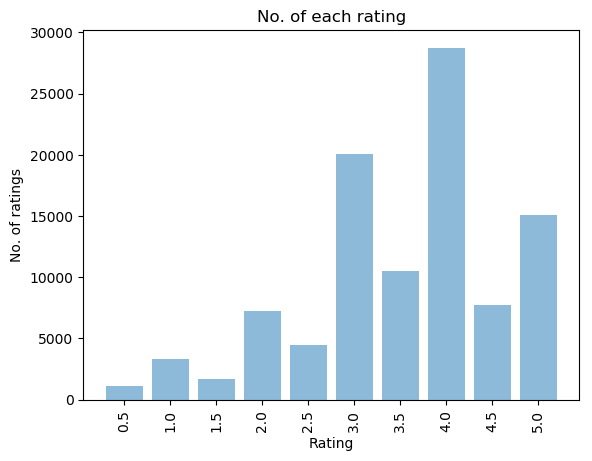

In [5]:
class data_handler():
    
    def __init__(self,path):
        self.path = path
        
        
    def get_names(self):
        
        movie_name = np.asarray(pd.read_csv(self.path+'movies.csv')[['title']])
#         movie_ID = np.asarray(pd.read_csv(self.path+'movies.csv')[['movieId']])
        return movie_name
    
    def read_data(self,plot=False):

        ratings = pd.read_csv(self.path+'ratings.csv')
        userId = np.asarray(ratings[['userId']])
        movieId = np.asarray(ratings[['movieId']])
        rating = np.asarray(ratings[['rating']])



        n_users = ratings.userId.unique() #find unique userId's
        n_items = ratings.movieId.unique() #find unique movieId's
        n_rating = ratings.rating.unique() #find number of unique ratings

        keys = n_items
        values = np.arange(len(n_items))
        dictionary = dict(zip(keys, values)) # dictionary maps index to movieId
        data = np.zeros((len(n_users), len(n_items))) 
        # rows correspond to userId and column correspond to movieId by the n_users and n_items arrays


        for i in range(len(ratings)): 
            movie_loc = dictionary.get(movieId[i][0])
            user_loc = userId[i]-1
            loc_rating = rating[i]    
            data[user_loc,movie_loc] = loc_rating

        userId = np.arange(len(n_users))
        np.random.seed(1)
        np.random.shuffle(data) 
        np.random.seed(1)
        np.random.shuffle(userId)

        if plot:
            import matplotlib.pyplot as plt;plt.rcdefaults()
            import matplotlib.pyplot as plt

            values = []
            n_rating = np.sort(n_rating)
            for i in range(len(n_rating)):
                values = np.append(values,np.count_nonzero(rating == n_rating[i]))


            plt.bar(np.arange(len(n_rating)), values, align='center', alpha=0.5)
            plt.xticks(np.arange(len(n_rating)), n_rating, rotation='vertical')
            plt.ylabel('No. of ratings')
            plt.xlabel("Rating")
            plt.title('No. of each rating')
            plt.show()

        return data,movieId

handler = data_handler(path = 'ml-latest-small/')
data, array_to_ID = handler.read_data(plot=True)



In [4]:
X_train,X_test = train_test_split(data, test_size=0.09)


save_path = './models/'
save_name = 'rec_system'

model = model.autoencoder(batch_size = 61,
                        num_hid1 = 256, 
                        num_hid2 = 128,
                        activation = 'relu')


model.fit(save_path = save_path, 
          save_name=save_name, 
          lr = 0.001, 
          epochs = 15, 
          X_train = X_train)


error,predictions = model.predict(save_path = save_path,
                                  save_name = save_name,
                                  X_test = X_test)


epoch 1 loss 0.18826191127300262
epoch 2 loss 0.16277289390563965
epoch 3 loss 0.12892475724220276
epoch 4 loss 0.09526646137237549
epoch 5 loss 0.06757356971502304
epoch 6 loss 0.05225429683923721
epoch 7 loss 0.046241700649261475
epoch 8 loss 0.0416555292904377
epoch 9 loss 0.039293497800827026
epoch 10 loss 0.04115999862551689
epoch 11 loss 0.03529669716954231
epoch 12 loss 0.034198909997940063
epoch 13 loss 0.03206465020775795
epoch 14 loss 0.031473882496356964
epoch 15 loss 0.028408609330654144
INFO:tensorflow:Restoring parameters from ./models/rec_system


In [10]:
# class returns top 3 recommendations for each user in the test data.
class find_recommendations():
    
    def __init__(self,predictions,data,movie_name):
        self.predictions = predictions
        self.data = data
        self.movie_name = movie_name
        
    def locate(self,num_recommendations):

        recommendations = {}
        
        for user in range(len(predictions)):

            rec = np.argsort(self.predictions[user])[::-1]
            user_unseen = np.where(self.data[user]==0)[0]
            
            intersection = []
            for x in rec:
                if x in user_unseen:
                    intersection = np.append(intersection,x)
                if len(intersection)==num_recommendations:
                    break
                    
            
            recommendations[user] = self.movie_name[intersection.astype(int)]
        return recommendations
    
movie_names = handler.get_names()    
engine = find_recommendations(predictions,X_test,movie_names)
recommendations = engine.locate(num_recommendations=3)

print("Recommendations for user 0 in test set:\n", recommendations[0])


Recommendations for user 0 in test set:
 [['Walker (1987)']
 ['Chinese Take-Out (Chinese Take-Away) (Un cuento chino) (2011)']
 ['Werner - Beinhart! (1990)']]


In [11]:
# Collaborative filtering
movie_names = handler.get_names()  
from scipy import spatial


user_in_q = data[0]
score = []
for user in data:
    score = np.append(score,spatial.distance.cosine(user_in_q, user))
score = np.delete(score,0)
location = np.argmax(score)


user_unseen = np.where(user_in_q ==0)
data_non_0s = np.where(data[np.argmax(score)]!=0)
recommendations = np.intersect1d(user_unseen,data_non_0s)

recommendations= data[location][recommendations]
recommendations = sorted(range(len(recommendations)), key=lambda i: recommendations[i])[-3:]

print(movie_names[recommendations])

[['Nick of Time (1995)']
 ['Mary Reilly (1996)']
 ['Vampire in Brooklyn (1995)']]
